## KOSPI

### 기본 세팅 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

plt.rc('font', family='NanumBarunGothic') 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# KOSPI 데이터 불러오기 
kospi = pd.read_csv('/content/drive/MyDrive/DSL/kospi_data.csv')

In [ ]:
kospi.dtypes

Date       object
Close     float64
Open      float64
High      float64
Low       float64
Volume    float64
Change    float64
dtype: object

In [ ]:
# 날짜 데이터타입 바꾸기 
kospi['Date'] = pd.to_datetime(kospi['Date'])
kospi.dtypes

Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Volume           float64
Change           float64
dtype: object

In [ ]:
kospi.isnull().sum()

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

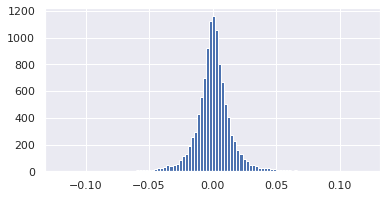

In [ ]:
# 히스토그램 : 정규분포 형태 
plt.hist(kospi['Change'], bins = 100)
plt.show()

### 일간 데이터 정리 

In [ ]:
kospi_mon = kospi.groupby(kospi['Date'].dt.strftime('%Y-%m')).mean()
kospi_mon

#strftime : 날짜 형식 데이터를 원하는 형태로 변환. 

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05,121.766667,121.766667,121.766667,121.766667,1.447792e+06,0.001333
1981-06,137.104000,137.104000,137.104000,137.104000,2.314800e+06,0.007212
1981-07,154.842308,154.842308,154.842308,154.842308,1.578923e+06,-0.000565
1981-08,145.368000,145.368000,145.368000,145.368000,8.250400e+05,-0.002160
1981-09,141.528000,141.528000,141.528000,141.528000,7.726800e+05,-0.002232
...,...,...,...,...,...,...
2022-04,2703.242857,2700.210000,2711.937143,2688.504762,9.540277e+08,-0.001062
2022-05,2628.338571,2628.356190,2642.547619,2613.174286,8.030019e+08,-0.000105
2022-06,2474.948500,2487.598500,2500.373500,2459.425500,6.007340e+08,-0.006930


In [ ]:
kospi['Date'].dt.strftime('%Y-%m')

0        1981-05
1        1981-05
2        1981-05
3        1981-05
4        1981-05
          ...   
11019    2022-08
11020    2022-08
11021    2022-08
11022    2022-08
11023    2022-08
Name: Date, Length: 11024, dtype: object

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_

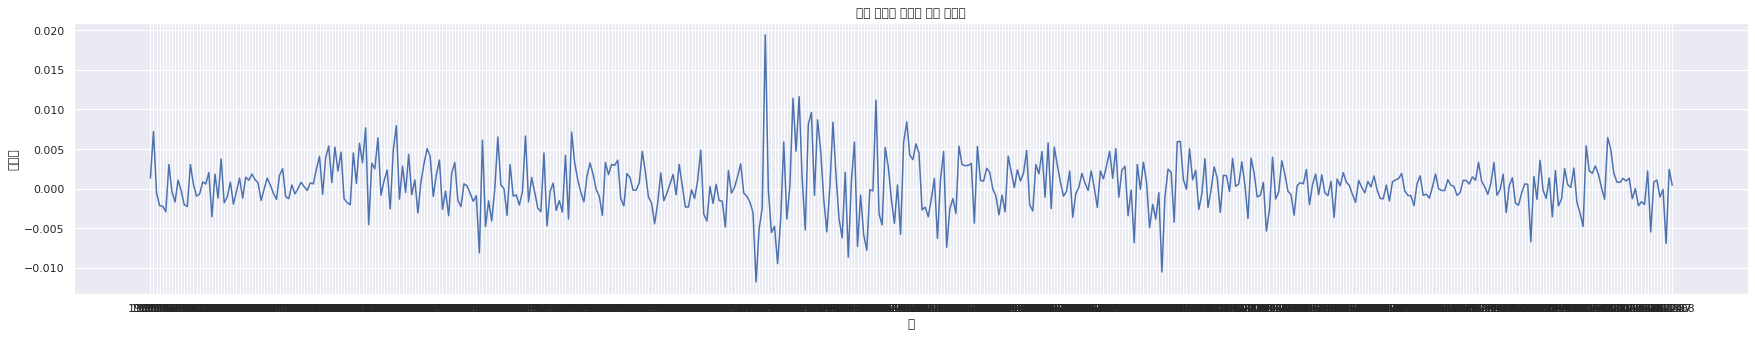

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [30, 5] 

plt.plot(kospi_mon['Change'])
plt.title('월별 일평균 변화율 추이 그래프')
plt.xlabel('월')
plt.ylabel('변화율')

plt.show()

In [ ]:
print(kospi_mon.index[kospi_mon['Change'] == max(kospi_mon['Change'])])
print(kospi_mon.index[kospi_mon['Change'] == min(kospi_mon['Change'])])

Index(['1998-01'], dtype='object', name='Date')
Index(['1997-10'], dtype='object', name='Date')


imf 시기에 일 변동량의 월 평균이 가장 극단적임을 알 수 있음. 
- 최대 : 98년 1월
- 최소 : 97년 10월

### 월간 데이터 정리

In [ ]:
#종가를 뒤로 1일 미룬 Close_lag 칼럼 생성
kospi['Close_lag'] = kospi['Close'].shift(1)

#로그수익률 칼럼 생성
kospi['Log_Rate'] = np.log(kospi['Close']/kospi['Close_lag'])
kospi

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667
...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857


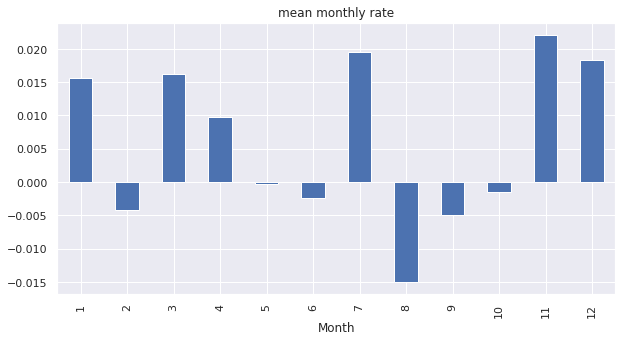

In [ ]:
kospi['Date'] = pd.to_datetime(kospi['Date'])

kospi['Month'] = [x.month for x in kospi['Date']]
kospi['Day'] = [x.day for x in kospi['Date']]
kospi['Year'] = [x.year for x in kospi['Date']]

df = pd.DataFrame({'Year':kospi['Year'], 
									'Month':kospi['Month']}).drop_duplicates(['Year', 'Month'])

rate = kospi.groupby(['Year', 'Month'])['Log_Rate'].sum()

df['Monthly_Rate'] = list(rate)

plt.rcParams['figure.figsize'] = [10, 5] 

df.groupby('Month')['Monthly_Rate'].mean().plot(kind = 'bar', title = 'mean monthly rate')


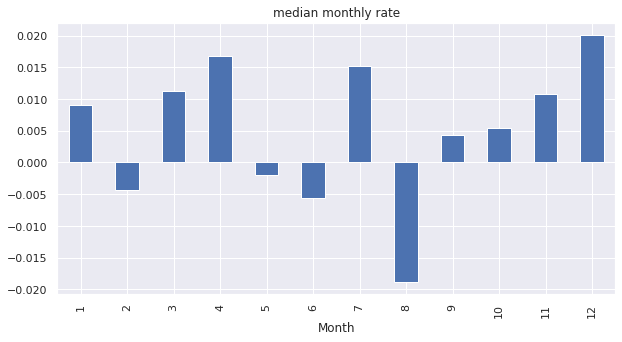

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5] 
df.groupby('Month')['Monthly_Rate'].median().plot(kind = 'bar', title = 'median monthly rate')

#### 등등

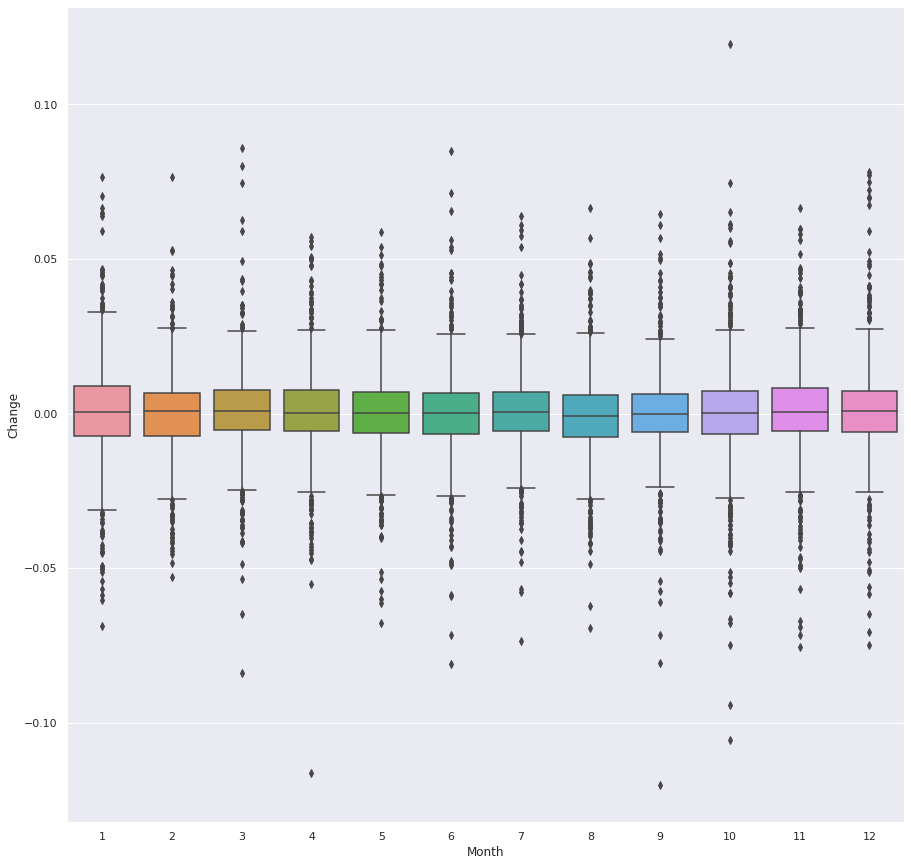

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(x='Month',y='Change', data=kospi)

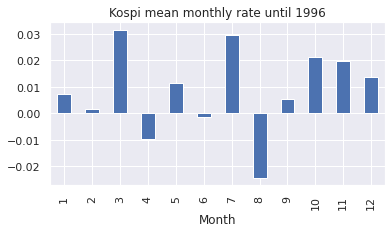

In [ ]:
kospi_1996 = kospi[kospi['Year'] <= 1996]

#각 연도와 월에 해당하는 월간수익률을 계산하기 위해 새로운 데이터프레임을 만듭니다
df_1996 = pd.DataFrame({'Year':kospi_1996['Year'], 
									'Month':kospi_1996['Month']}).drop_duplicates(['Year', 'Month'])
#각 연도와 월에 해당하는 로그수익률들만 모아서 합해주면 월간수익률이 얻어집니다.
rate = kospi_1996.groupby(['Year', 'Month'])['Log_Rate'].sum()
#만들어놓은 데이터프레임에 Monthly_Rate이라는 칼럼으로 월간수익률을 넣어줍니다.
df_1996['Monthly_Rate'] = list(rate)

plt.rcParams['figure.figsize'] = [6, 3] 
#동일한 월의 월간수익률의 평균을 그리면
df_1996.groupby('Month')['Monthly_Rate'].mean().plot(kind = 'bar', title = 'Kospi mean monthly rate until 1996')

# S&P 500 

### 기본 세팅

In [ ]:
SP = pd.read_csv('/content/drive/MyDrive/DSL/S&P_data.csv')

In [ ]:
SP.dtypes

In [ ]:
SP.isnull().sum()

### 월간 수익률


In [ ]:
#날짜Date 칼럼을 datetime 타입으로 바꾸기
SP['Date'] = pd.to_datetime(SP['Date'])
#Date에서 월과 년만 분리해서 변수 만들기
SP['Month'] = [x.month for x in SP['Date']]
SP['Day'] = [x.day for x in SP['Date']]
SP['Year'] = [x.year for x in SP['Date']]

#각 연도와 월에 해당하는 월간수익률을 계산하기 위해 새로운 데이터프레임을 만듭니다
df = pd.DataFrame({'Year':SP['Year'], 
									'Month':SP['Month']}).drop_duplicates(['Year', 'Month'])
#각 연도와 월에 해당하는 로그수익률들만 모아서 합해주면 월간수익률이 얻어집니다.
rate = SP.groupby(['Year', 'Month'])['Log_Rate'].sum()
#만들어놓은 데이터프레임에 Monthly_Rate이라는 칼럼으로 월간수익률을 넣어줍니다.
df['Monthly_Rate'] = list(rate)

plt.rcParams['figure.figsize'] = [6, 3] 

#동일한 월의 월간수익률의 평균을 그리면
df.groupby('Month')['Monthly_Rate'].mean().plot(kind = 'bar', title = 'mean monthly rate')

In [ ]:
df.groupby('Month')['Monthly_Rate'].median().plot(kind = 'bar', title = 'median monthly rate')

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x='Month',y='Change', data=SP)

In [ ]:
SP[SP['Change'] == SP['Change'].min()]

In [ ]:
SP_1991 = SP[SP['Year'] <= 1991]

#각 연도와 월에 해당하는 월간수익률을 계산하기 위해 새로운 데이터프레임을 만듭니다
df_1991 = pd.DataFrame({'Year':SP_1991['Year'], 
									'Month':SP_1991['Month']}).drop_duplicates(['Year', 'Month'])
#각 연도와 월에 해당하는 로그수익률들만 모아서 합해주면 월간수익률이 얻어집니다.
rate = SP_1991.groupby(['Year', 'Month'])['Log_Rate'].sum()
#만들어놓은 데이터프레임에 Monthly_Rate이라는 칼럼으로 월간수익률을 넣어줍니다.
df_1991['Monthly_Rate'] = list(rate)

plt.rcParams['figure.figsize'] = [6, 3] 
#동일한 월의 월간수익률의 평균을 그리면
df_1991.groupby('Month')['Monthly_Rate'].mean().plot(kind = 'bar', title = 'S&P mean monthly rate until 1991')

In [ ]:
SP_tail = SP.groupby('Year').tail(5)
SP_head = SP.groupby('Year').head(2)
SP_santa= pd.concat([SP_tail, SP_head]).drop_duplicates() # 왜 겹치는 게 발생? 
SP_santa = SP_santa.sort_values(by='Date')